# Course Project

***

COMP 4304 \
Terrence Tricco

April 8, 2023

Student Name: Trishir Kumar Singh\
Student ID: 202023149

***

## Goals and Sub-goals

***
The main goal is to answer the question, "Where should efforts be focused to improve the safety of Canadian air space?".

This task was guided by the following sub-goals:
- Is there any corelation between the severity of the incidents and the airlines involved?
- Do the major airports display a noticeable trend compared to all the airports?
- Does the time or year of the incident glean any patterns?

***

# Load Libaries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

***

### First Visual


First pandas is used to prepare and cleanup the data.

In [2]:
# Read and prepare necessary data.
df = pd.read_csv("flights.csv")
df_non_serious = df[df.serious_incident == "No"][["id","incident_type", "reportable_incident", "damage", "operator_type", "organization"]].reset_index()
df_serious = df[df.serious_incident == "Yes"][["id","incident_type", "reportable_incident", "damage", "operator_type", "organization"]].reset_index()

# Group and sort the data.
df_serious_grouped = df_serious[["id", "organization"]].groupby("organization").count().sort_values(by = "id", ascending = False).head(30).reset_index()
df_non_serious_grouped = df_non_serious[["id", "organization"]].groupby("organization").count().sort_values(by = "id", ascending = False).head(30).reset_index()

# Perform necessary cleaning and merging.
df_non_serious_grouped = df_non_serious_grouped.rename(columns = {"id": "non_serious_count"})
df_serious_grouped = df_serious_grouped.rename(columns = {"id": "serious_count"})
df_all_incidents = df_serious_grouped.merge( df_non_serious_grouped)
df_all_incidents["all_count"] = df_all_incidents.non_serious_count + df_all_incidents.serious_count

Then horizontal barplot is used to display the data.

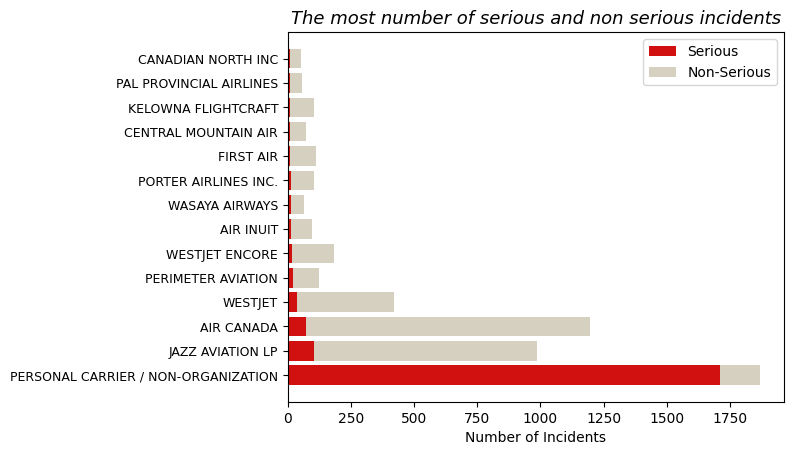

In [3]:
fig, ax = plt.subplots()
ax.barh(df_all_incidents.organization, df_all_incidents.serious_count, color = "#d01110", label = "Serious")
ax.barh(df_all_incidents.organization, df_all_incidents.non_serious_count, color = "#d6d0c0", left = df_all_incidents.serious_count, label = "Non-Serious")
ax.set_title('The most number of serious and non serious incidents', fontstyle='italic', fontsize=13)
ax.set_xlabel("Number of Incidents")
plt.yticks(fontsize=9)
ax.legend()
plt.show();

***

### Second Visual


First pandas is used to prepare and cleanup the data.

In [4]:
# Read and prepare necessary data.
df = pd.read_csv("flights.csv")
df1 = df[["id", "incident_type", "departure_airport_code"]]
df2 = df1[["incident_type", "departure_airport_code"]]
df2 = df2[df2.departure_airport_code.str.contains("YUL") | 
          df2.departure_airport_code.str.contains("YYC") | 
          df2.departure_airport_code.str.contains("YYZ") | 
          df2.departure_airport_code.str.contains("YVR")].reset_index()

# Group and sort the data.
df2["major_count"] = 1
df2=df2[["major_count", "incident_type"]].groupby("incident_type").count().reset_index()
df1 = df1[["id", "incident_type"]].groupby("incident_type").count().reset_index()

# Perform necessary cleaning and merging.
df3 = df1.merge(df2).rename(columns={"id" : "all_count"})
df3= df3[df3.all_count > 100]
df3['ratio'] = df3.major_count/df3.all_count * 100
df3 = df3.sort_values(by='ratio').reset_index()

Then a scatter plot is used to display the data.

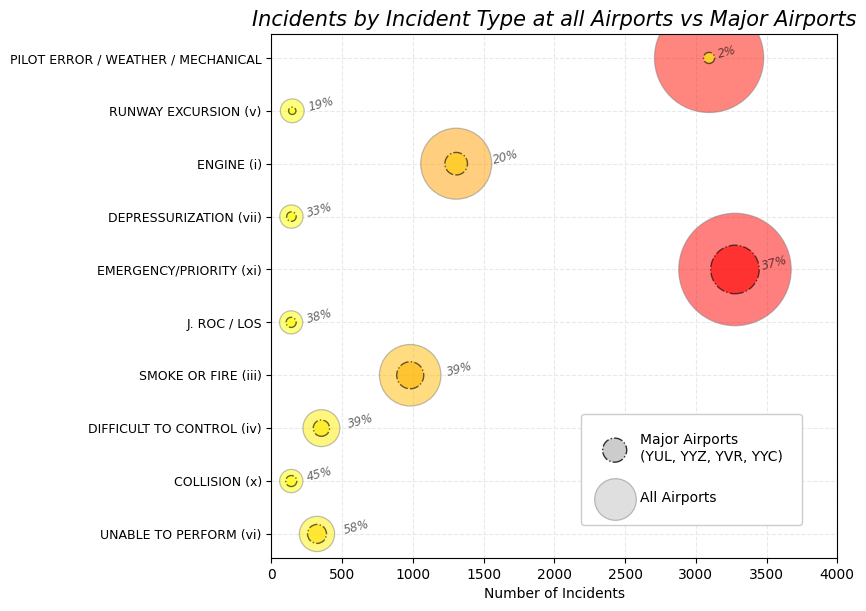

In [5]:
fig, ax = plt.subplots(figsize=(7.3,6.8))

# Scatter Plot
ax.scatter(df3.all_count,df3.incident_type,  s= df3.major_count, alpha = 0.6, c=df3.major_count, cmap="autumn_r" , edgecolors="black", zorder = 3,linestyle='-.')
ax.scatter(df3.all_count,df3.incident_type, s= df3.all_count*2,  alpha = 0.5, c=df3.all_count, cmap = "autumn_r", edgecolors= "grey", zorder = 2,linewidths=0.9)

# Legend
temp1=ax.scatter([], [], alpha=0.8, s=300,label="Major Airports\n(YUL, YYZ, YVR, YYC)", color = "silver", edgecolors="black",linestyle='-.')
temp2=ax.scatter([], [], alpha=0.5, s=900,label="All Airports", color = "silver", edgecolors="grey", linewidths=0.9)
ax.legend(scatterpoints=1, loc='lower right', bbox_to_anchor = (0.95,0.05), framealpha=1, labelspacing=2, fontsize = 10, borderpad=1.4)

# Visual elements.
ax.set_xlabel("Number of Incidents")
ax.set_title("Incidents by Incident Type at all Airports vs Major Airports", fontstyle='italic', fontsize=15)
ax.set_xbound(0, 4000)
ax.invert_yaxis()
ax.grid(visible = True, zorder=1, linestyle='--', color='#E8E9EB')
plt.yticks(fontsize=9)

# Annotate with percent values
for i, txt in enumerate(df3.ratio):
    if i==0:
        ax.annotate(str(round(txt))+"%", (df3.all_count[i]+50, df3.incident_type[i]), rotation=15, fontstyle='oblique', alpha=0.6, fontsize=8.5)
    elif i in [4,7,9]:
        ax.annotate(str(round(txt))+"%", (df3.all_count[i]+180, df3.incident_type[i]), rotation=15, fontstyle='oblique', alpha=0.6, fontsize=8.5)
    elif i in [2, 6]:
        ax.annotate(str(round(txt))+"%", (df3.all_count[i]+250, df3.incident_type[i]), rotation=15, fontstyle='oblique', alpha=0.6, fontsize=8.5)
    else:
        ax.annotate(str(round(txt))+"%", (df3.all_count[i]+100, df3.incident_type[i]), rotation=15, fontstyle='oblique', alpha=0.6, fontsize=8.5)

plt.show();

***

### Third Visual

Design taken from https://leaherb.com/radial-data-challenge/


First pandas is used to prepare and cleanup the data.

In [6]:
# Read and prepare necessary data.
df = pd.read_csv("flights.csv")
df.date = pd.to_datetime(df.date)
df['hour'] = df.date.dt.hour

# Group the data.
df1 = df[['hour', 'id']].groupby('hour').count().reset_index()
df1['angle'] = (df1.hour / 24 * 2 * 3.14159) - 0.1315

Then a polar plot is used to display the data.

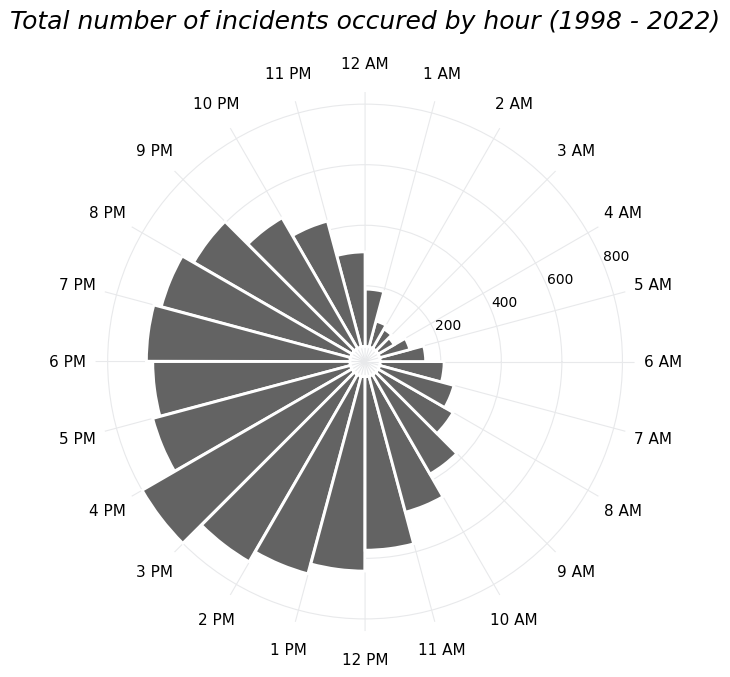

In [7]:
plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

# Create the polar plot.
bars=ax.bar(x = df1.angle, 
       height=df1.id, 
       edgecolor='white', 
       linewidth=2, 
       width=0.26,
       color="#636363",
       bottom=50
      )

# Make visual improvements.
ax.spines['polar'].set_color(None)
ax.set_xticks([x / 24 * 2.0 * 3.14159 for x in range(24)])
label = ([str(x) + ' AM' for x in range(6,0,-1)] + 
         ['12 AM'] + [str(x) + ' PM' for x in range(11,0,-1)]+
         ['12 PM']+ [str(x) + ' AM' for x in range(11,6,-1)])
ax.set_xticklabels(labels=label, fontsize=11)
ax.xaxis.set_tick_params(pad=10)
ax.set_rgrids([50,250, 450, 650, 850])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['', 200, 400, 600, 800], fontsize = 10);
ax.grid(visible = True, zorder=1, color='#E8E9EB');
for bar in bars:
    bar.set_zorder(2)
ax.set_title('Total number of incidents occured by hour (1998 - 2022)',
             fontstyle='italic', fontsize=18, pad = 20)
plt.show();

***

### Fourth Visual

Design taken from https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/bulletins/babynamesenglandandwales/2020


First pandas is used to prepare and cleanup the data.

In [8]:
df = pd.read_csv("flights.csv")
df.date = pd.to_datetime(df.date)
df5 = df[['aircraft_make', 'id', 'date']].copy()
df5['year'] = df5.date.dt.year
df5 = df5.drop(columns='date')
df5=df5.groupby(['aircraft_make', 'year']).count().reset_index().rename(columns={'id':'count'})

Then a line plot is used to display the data.

In [9]:
@interact(names = widgets.Text(placeholder = 'Enter Aircraft Maker separated by a Comma (Upto 6 names allowed)',
                                 description = 'Maker: ', layout = widgets.Layout(width='700px')))
def f(names):
    # Prepare the necessary variables
    show_names = names.upper().split(",")
    lim = 6 if (len(show_names) >= 6) else len(show_names)
    my_colors =plt.get_cmap('Set2')
    my_markers=['o','p','P','v', 's', 'd']
    
    # Plot the base line plot.
    fig, ax = plt.subplots(figsize=(10,7))
    ax = sns.lineplot(data = df5, x = 'year', y = 'count', hue = 'aircraft_make',
                      palette = ('#E0DFDA',), legend =False)
    
    # Plot the highlighted lines.
    col_count = 0
    contained_names = []
    for i in range(lim):
        show_names[i] = show_names[i].strip()
        if show_names[i] in df5['aircraft_make'].values:
            contained_names.append(show_names[i])
            df5_temp = df5[df5.aircraft_make == show_names[i]]
            plt.plot(df5_temp['year'], df5_temp['count'], 
                     color=my_colors(col_count), marker=my_markers[col_count], label =show_names[i])
            col_count += 1
            
    # Display the legend if necessary.
    if(len(contained_names) > 0):
        ax.legend(loc = 'upper right')
        
    # Make the visual changes.
    sns.despine(top=True, right=True, left=True)
    ax.grid(axis='y')
    ax.set_xticks([i for i in range(1998, 2023, 2)])
    ax.set_yticks([i for i in range(0, 101, 10)])
    ax.set_title('Incident count over 1998-2022 by Aircraft Makers', fontsize = 15, pad = 15)
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.show();

interactive(children=(Text(value='', description='Maker: ', layout=Layout(width='700px'), placeholder='Enter A…